<a href="https://colab.research.google.com/github/DeodatoBastos/Imersao_Dados/blob/main/ImersaoDados_4_Pesquisa_de_Imoveis_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [357]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

## Visão geral do *dataset*

In [358]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [359]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


## Metragem de cada bairro

Para entender melhor os dados que estamos trabalhando é preciso buscar relações entre os tipos de dados, colunas. Assim, faz-se a metrage para cada bairro, para saber como que essa *feature* está distribuida pelos bairros

In [360]:
metragem_por_bairro = dados.groupby(by='Bairro')['Metragem']
media_metragem = metragem_por_bairro.mean().sort_values(ascending=False)
media_metragem

Bairro
Sítio Represa                        37000.00
Vila Castelo                          2850.00
Jardim Guedala                        2486.64
Jardim das Camélias                   1700.00
Chácara Flora                         1260.73
                                       ...   
Cidade Antônio Estevão de Carvalho      57.50
Jardim Nova Germania                    57.00
Jardim Benfica                          48.00
Vila Leonor                             46.00
Vila Guaca                              10.00
Name: Metragem, Length: 701, dtype: float64

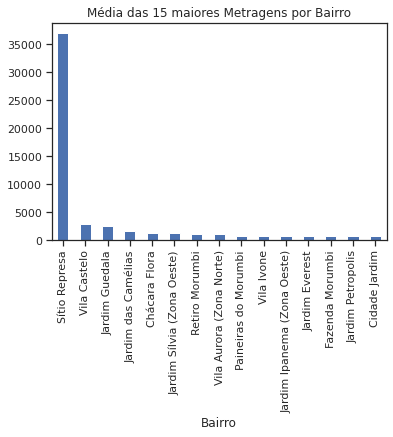

In [447]:
media_metragem.head(15).plot.bar(title='Média das 15 maiores Metragens por Bairro')

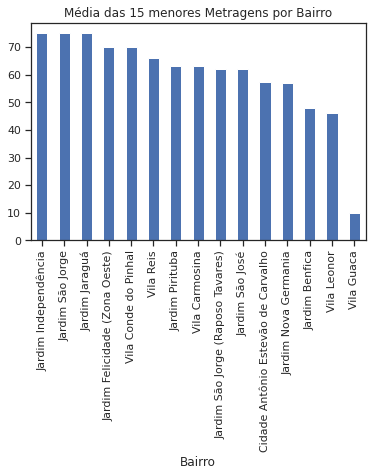

In [448]:
media_metragem.tail(15).plot.bar(title='Média das 15 menores Metragens por Bairro')

## Filtros por bairros

Dentro do *dataset* é importante filtrar os dados para saber informações específicas de uma determinada região, ou para também entender qual a distribuição de uma *feature* em relação a outra.

Nas células abaixo há duas formas de fazer essa filtragem

In [449]:
bairro_cidade_jardim = dados.loc[lambda df: df['Bairro'] == 'Cidade Jardim', :]
bairro_cidade_jardim.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Modalidade
7183,NaN,Cidade Jardim,São Paulo,530,5,7,4,R$ 5.000.000,R$,5.000.000,None
2739,NaN,Cidade Jardim,São Paulo,1530,5,5,30,R$ 90.000\n /Mês,R$,90.000,/Mês
8903,Rua Boytac,Cidade Jardim,São Paulo,555,5,5,6,R$ 4.000.000,R$,4.000.000,None
2997,Avenida das Magnólias,Cidade Jardim,São Paulo,905,4,7,10,R$ 10.000.000,R$,10.000.000,None
2769,NaN,Cidade Jardim,São Paulo,1535,5,5,30,R$ 90.000\n /Mês,R$,90.000,/Mês
3000,NaN,Cidade Jardim,São Paulo,517,4,5,8,R$ 15.000\n /Mês,R$,15.000,/Mês
7908,NaN,Cidade Jardim,São Paulo,655,5,7,8,R$ 5.300.000,R$,5.300.000,None
895,Rua das Zínias,Cidade Jardim,São Paulo,555,5,3,4,R$ 25.000\n /Mês,R$,25.000,/Mês
2108,NaN,Cidade Jardim,São Paulo,503,4,5,4,R$ 3.600.000,R$,3.600.000,None
7137,NaN,Cidade Jardim,São Paulo,482,4,5,6,R$ 2.300.000,R$,2.300.000,None


In [450]:
bairro_pacaembu = dados[dados['Bairro'] == 'Pacaembu']
bairro_pacaembu.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Modalidade
2728,NaN,Pacaembu,São Paulo,890,4,7,7,R$ 4.600.000,R$,4.600.000,None
873,"Avenida Pacaembu, 100",Pacaembu,São Paulo,405,4,3,4,R$ 4.000.000,R$,4.000.000,None
1405,Rua Bragança,Pacaembu,São Paulo,1156,5,7,8,R$ 18.720.000,R$,18.720.000,None
2172,Rua José de Freitas Guimarães,Pacaembu,São Paulo,424,4,2,6,R$ 2.700.000,R$,2.700.000,None
3121,Rua Sílvio Portugal,Pacaembu,São Paulo,875,7,1,6,R$ 3.200.000,R$,3.200.000,None
9918,Rua Bragança,Pacaembu,São Paulo,280,3,4,5,R$ 2.450.000,R$,2.450.000,None
2266,NaN,Pacaembu,São Paulo,456,4,5,11,R$ 3.200.000,R$,3.200.000,None
7874,NaN,Pacaembu,São Paulo,660,3,5,12,R$ 9.000.000,R$,9.000.000,None
5745,Rua José de Freitas Guimarães,Pacaembu,São Paulo,405,3,3,4,R$ 2.200.000,R$,2.200.000,None
9436,Rua Penápolis,Pacaembu,São Paulo,305,3,2,4,R$ 2.900.000,R$,2.900.000,None


## Análises sobre alguns dados

Ainda sobre entender melhor a base de dados, é preciso saber como esses dados estão distribuidos, se há valores muito discrepantes, se todos os valores estão muito próximos uns dos outros. Com essas informações pode-se tomar decisões mais acertadas no futuro, como remover dados, remover *features*, entre outros. 

Uma boa forma de ver distribuições é com um histograma, abaixo foi gerado o gráfico do número de __Vagas__, __Banheiros__, __Quartos__ e __Metragem__, pela frequência que esses valores apareciam.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3feebc2f10>,
      dtype=object)

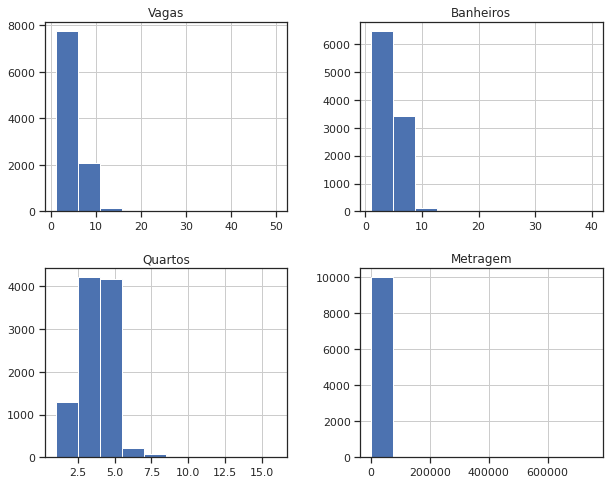

In [454]:
dados[['Vagas', 'Banheiros', 'Quartos', 'Metragem']].hist(figsize=(10, 8))

### Conclusões

A partir dos histogramas plotados, pode-se ver que a há uma concentração muito grande em pequenos valores nas colunas *Vagas*, *Banheiros*, *Quartos*.

Na coluna *Metragem* há algum dado muito destoante, visto que no histograma há valores bem altos, porém quase não há pontos com altos valores. Isso pode significar que esses pontos destoantes podem ser erros na hora de criar o *dadosset*.

Algo semelhante é visto nas outras colunas, contudo o fenômeno não é tão acentuado quanto na *Metragem*. Logo, retirar esses dados pode ser uma boa ação para evitar futuros problemas com o modelo a ser criado.

## Outros dados relevantes

Ainda sobre o entendimento da base, conhecer algumas grandezas estatísticas, como média, mediana, entre outros. Esse números melhoram a visão sobre a distribuição das *features*, além de não depender apenas de observar gráficos

In [455]:
dt_filter = dados[['Quartos', 'Banheiros', 'Vagas']]
dt_filter.head()

,Quartos,Banheiros,Vagas
0,4,8,6
1,4,4,4
2,4,3,2
3,3,2,4
4,3,2,2


In [456]:
mean_list = dt_filter.mean().to_list()
median_list = dt_filter.median().to_list()
min_list = dt_filter.min().to_list()
max_list = dt_filter.max().to_list()
std_list = dt_filter.std().to_list()

In [457]:
dict_dados = {'Media': mean_list, 'Mediana': median_list,
             'Minimo': min_list, 'Maximo': max_list,
             'Desvio_Padrao': std_list}
statistics = pd.DataFrame(data=dict_dados, index=['Quartos',  'Banheiros', 'Vagas'])
statistics

,Media,Mediana,Minimo,Maximo,Desvio_Padrao
Quartos,3.48,3.00,1,16,1.06
Banheiros,3.88,4.00,1,40,1.99
Vagas,4.10,4.00,1,50,2.82


## Bairros sem nome de rua

Comumente há dados faltando na base, é preciso saber alguma forma de encontrá-los e tratá-los. Esse precesso é importante, pois trabalhar com dados imcompletos pode ser problemático para as análises, visto que essa falta de informação pode gerar análises e conclusões equivocadas, por casua de um gráfico não condizente com a realidade, ou uma métrica errada.

In [458]:
ruas_sem_nome = dados[dados['Rua'].isna()]
ruas_sem_nome.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Modalidade
7242,NaN,Vila Caraguatá,São Paulo,160,4,2,2,R$ 480.000,R$,480.000,None
1821,NaN,Jardim Europa,São Paulo,1301,5,7,10,R$ 26.000.000,R$,26.000.000,None
8775,NaN,Vila Anhangüera,São Paulo,180,3,4,4,R$ 1.250.000,R$,1.250.000,None
9622,NaN,Vila Gumercindo,São Paulo,185,3,5,4,R$ 1.350.000,R$,1.350.000,None
4174,NaN,Jardim das Bandeiras,São Paulo,400,4,4,6,R$ 3.850.000,R$,3.850.000,None
9602,NaN,Mooca,São Paulo,316,3,3,12,R$ 2.000.000,R$,2.000.000,None
9712,NaN,Vila Ida,São Paulo,271,4,3,4,R$ 1.900.000,R$,1.900.000,None
7319,NaN,Jardim Cordeiro,São Paulo,640,5,7,7,R$ 6.000.000,R$,6.000.000,None
3664,NaN,Alto de Pinheiros,São Paulo,216,3,4,7,R$ 4.850.000,R$,4.850.000,None
4453,NaN,Vila Sílvia,São Paulo,125,2,3,2,R$ 300.000,R$,300.000,None


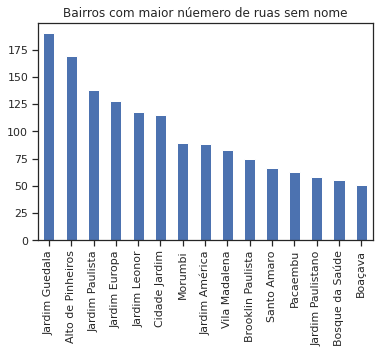

In [461]:
ruas_sem_nome['Bairro'].value_counts().head(15).plot.bar(
    title="Bairros com maior núemero de ruas sem nome")

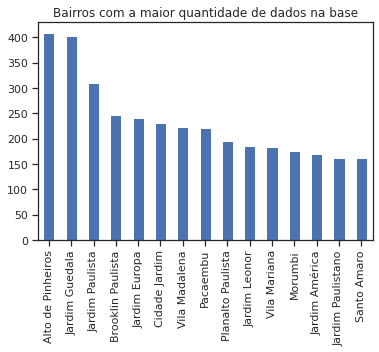

In [462]:
dados['Bairro'].value_counts().head(15).plot.bar(
    title="Bairros com a maior quantidade de dados na base")

### Conclusões

Pelos gráficos de barras, acima, vê-se que há uma relação entre a quantidade de ruas em um bairro e a quantidade de ruas sem nome no mesmo bairro. Isso parece fazer sentido, visto que quanto mais ruas há em um bairro, mais fácil ter algum dado perdido, ou que falta, nesse caso o nome da rua.

Contudo, essa relação não é diretamente procional, visto que não segue a mesma ordem que os dados originais, em quantidade de ruas, comparanando com o número de ruas sem nome.

## Trantando a coluna *Valor*

Outro passo importante ao se trabalhar com uma base de dados é saber tratar os dados. Esse processo, pode ser visto, simplificadamente, como a transformação dos dados brutos em informações que possam ser utilizadas para tomar decisões.

No caso da base que estamos trabalhando a coluna __Valor__ é uma *string*, isto é, uma frase, por isso precisamos transformá-la em um dado do tipo numérico.

In [463]:
dados_valores = dados["Valor"].str.split(expand = True)

In [464]:
dados_valores[0].unique()

array(['R$'], dtype=object)

In [465]:
len(dados_valores[1].unique()), dados_valores[1].unique()

(1038, array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
        '2.200'], dtype=object))

In [466]:
dados_valores[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [467]:
dados[['Moeda', 'Preco', 'Modalidade']] = dados_valores
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Modalidade
1369,Rua Sampaio Vidal,Jardim Paulistano,São Paulo,196,2,4,2,R$ 28.800\n /Mês,R$,28.800,/Mês
6420,NaN,Vila Sônia,São Paulo,121,2,3,2,R$ 750.000,R$,750.000,None
1933,NaN,Morumbi,São Paulo,1205,6,11,6,R$ 9.500.000,R$,9.500.000,None
8520,Rua Guiratinga,Chácara Inglesa,São Paulo,207,3,3,4,R$ 2.200.000,R$,2.200.000,None
8689,Rua Montezuma,Jardim das Bandeiras,São Paulo,300,4,4,4,R$ 4.510.000,R$,4.510.000,None
1915,NaN,Fazenda Morumbi,São Paulo,445,4,5,3,R$ 20.000\n /Mês,R$,20.000,/Mês
8452,Rua Antônio Salema,Vila Morse,São Paulo,146,3,2,2,R$ 3.600\n /Mês,R$,3.600,/Mês
3288,Rua Doutor Tomás Alves,Vila Mariana,São Paulo,405,3,3,2,R$ 14.000\n /Mês,R$,14.000,/Mês
6566,NaN,Jardim Everest,São Paulo,642,4,5,6,R$ 5.200.000,R$,5.200.000,None
992,Rua Rumaica,Vila Ipojuca,São Paulo,180,3,3,3,R$ 1.650.000,R$,1.650.000,None


In [468]:
dados_vendas = dados[dados["Modalidade"].isnull()]
dados_vendas.Modalidade.unique()

array([None], dtype=object)

In [469]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rua         6107 non-null   object
 1   Bairro      9146 non-null   object
 2   Cidade      9156 non-null   object
 3   Metragem    9156 non-null   int64 
 4   Quartos     9156 non-null   int64 
 5   Banheiros   9156 non-null   int64 
 6   Vagas       9156 non-null   int64 
 7   Valor       9156 non-null   object
 8   Moeda       9156 non-null   object
 9   Preco       9156 non-null   object
 10  Modalidade  0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


Para facilitar a visualização e compreensão dos dados, vamos salvar a informação do preço de cada imóvel em milhões.

In [471]:
dados_vendas["Preco_em_M"] = dados_vendas["Preco"].str.replace(".", "").astype(float) / 1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


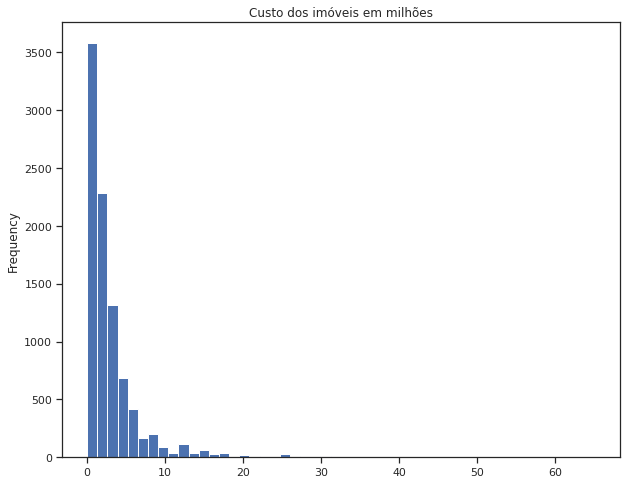

In [475]:
plt.figure(figsize=(10, 8))
dados_vendas["Preco_em_M"].plot.hist(bins=50, title="Custo dos imóveis em milhões")
plt.xlabel="Custo"
plt.ylabel="Número de imóveis"
plt.show()

In [476]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Preco_em_M
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3.05
std,7856.42,1.05,1.97,2.60,3.94
min,10.00,1.00,1.00,1.00,0.01
25%,168.00,3.00,2.00,2.00,0.89
50%,276.00,3.00,4.00,4.00,1.80
75%,450.00,4.00,5.00,5.00,3.50
max,750000.00,16.00,40.00,50.00,65.00


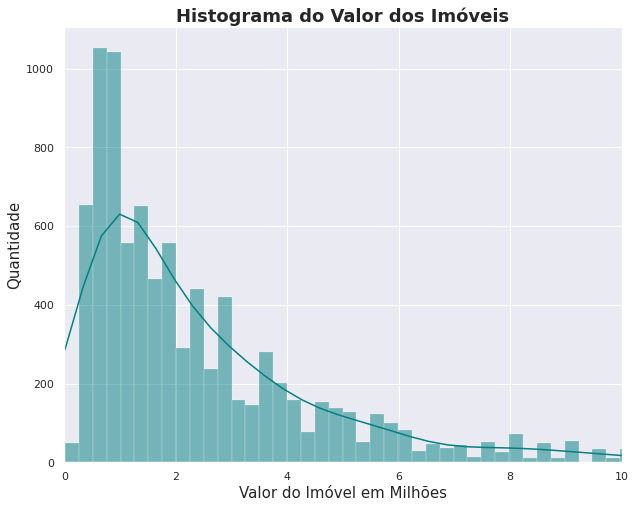

In [477]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=dados_vendas, x='Preco_em_M', kde=True, color='teal', palette="light:m_r")
ax.set_title('Histograma do Valor dos Imóveis', weight='bold', size=18)
ax.set_xlim(-0.01, 10)
ax.set_xlabel("Valor do Imóvel em Milhões", size=15)
ax.set_ylabel("Quantidade", size=15)
plt.show()

O histograma acima representa a maioria dos valores dos imóveis. Como pode-se ver a maior parte está concentrada em 1 milhão, com uma longa cauda, indicando que há alguns poucos imóveis bem caros.

## *Cross feature*

Uma boa forma de entendender melhor os dados de um *dataset* e assim poder tomar uma decisão melhor é juntas *features* para montar uma nova relação e assim ter uma nova visão sobre o problema.

Dessa forma, criou-se a coluna __Preco/m2__ que guarda o valor do metro quadrado de cada imóvel

In [478]:
dados_vendas["Preco/m2"] = dados_vendas["Preco_em_M"] * 1000000 / dados_vendas["Metragem"]
dados_vendas.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Modalidade,Preco_em_M,Preco/m2
5844,Alameda dos Guaicanãs,Planalto Paulista,São Paulo,240,4,1,2,R$ 1.780.000,R$,1.780.000,None,1.78,7416.67
8416,Rua Ubaíra,Indianópolis,São Paulo,205,3,4,4,R$ 1.990.000,R$,1.990.000,None,1.99,9707.32
6155,Rua Carlos Petit,Vila Mariana,São Paulo,290,3,1,3,R$ 2.500.000,R$,2.500.000,None,2.50,8620.69
5826,Rua Portugal,Jardim Europa,São Paulo,693,4,5,6,R$ 16.000.000,R$,16.000.000,None,16.00,23088.02
1621,NaN,Morumbi,São Paulo,419,3,4,26,R$ 2.800.000,R$,2.800.000,None,2.80,6682.58
4928,NaN,Alto de Pinheiros,São Paulo,480,4,4,4,R$ 3.250.000,R$,3.250.000,None,3.25,6770.83
3302,Rua Júlio Ribeiro Neto,Jardim Leonor,São Paulo,323,3,5,4,R$ 1.850.000,R$,1.850.000,None,1.85,5727.55
6402,"Rua Jurupari, 487",Jardim Oriental,São Paulo,179,3,4,4,R$ 630.000,R$,630.000,None,0.63,3519.55
538,"Rua Guaraiúva, 904",Cidade Monções,São Paulo,300,4,1,4,R$ 2.000.000,R$,2.000.000,None,2.00,6666.67
8912,NaN,Jardim Cidalia,São Paulo,130,3,1,5,R$ 800.000,R$,800.000,None,0.80,6153.85


In [479]:
m2_por_bairro = dados_vendas.groupby(by='Bairro')["Preco/m2"].mean().sort_values(
    ascending=False).reset_index()

[]

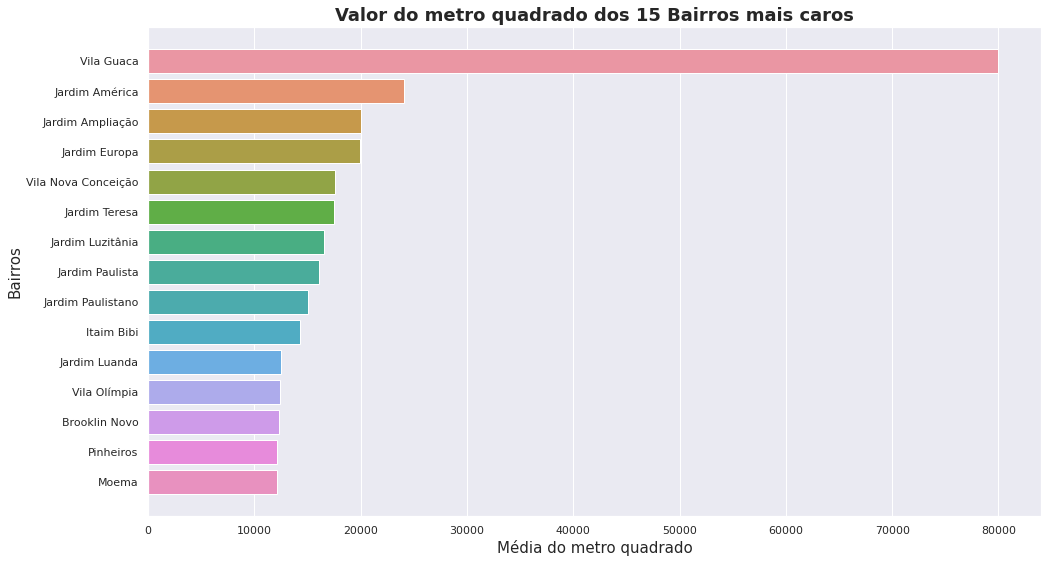

In [483]:
sns.set()
plt.figure(figsize=(16, 9))
ax = sns.barplot(y="Bairro", x="Preco/m2", data=m2_por_bairro[:15])
ax.set_title('Valor do metro quadrado dos 15 Bairros mais caros', weight='bold', size=18)
ax.set_xlabel("Média do metro quadrado", size=15)
ax.set_ylabel("Bairros", size=15)
plt.plot()

Uma outra forma de visualizar essa *feature* é fazer a média do metro quadrado para cada bairro, assim pode-se ter uma visão um pouco diferente do problema

In [484]:
dados_bairro = dados_vendas.groupby("Bairro").sum().reset_index()
dados_bairro.head()

,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco_em_M,Preco/m2
0,Aclimação,19447,258,240,230,139.29,604837.39
1,Alto da Boa Vista,3351,33,41,37,19.13,46796.55
2,Alto da Lapa,23940,252,308,320,166.65,608538.25
3,Alto da Mooca,5401,66,52,73,23.68,113834.80
4,Alto de Pinheiros,158616,1453,1782,1827,1764.82,4158622.61


In [485]:
dados_bairro["Valor/m2_bairro"] = dados_bairro["Preco_em_M"] * 1000000 / dados_bairro["Metragem"]

In [486]:
dados_vendas.groupby("Bairro").mean().loc["Vila Mariana"]

Metragem      231.24
Quartos         3.39
Banheiros       3.24
Vagas           2.95
Preco_em_M      1.77
Preco/m2     7913.15
Name: Vila Mariana, dtype: float64

In [487]:
dados_bairro[dados_bairro["Bairro"] == "Vila Mariana"]

,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco_em_M,Preco/m2,Valor/m2_bairro
569,Vila Mariana,39079,573,547,499,299.33,1337323.16,7659.51


Como pode ser visto, o valor do Preço por metro quadrado foi um pouco diferente para os dois métodos

In [490]:
top_bairros = dados_vendas["Bairro"].value_counts()[:15].index

Text(0.5, 0, 'Preço Metro quadrado por Bairro')

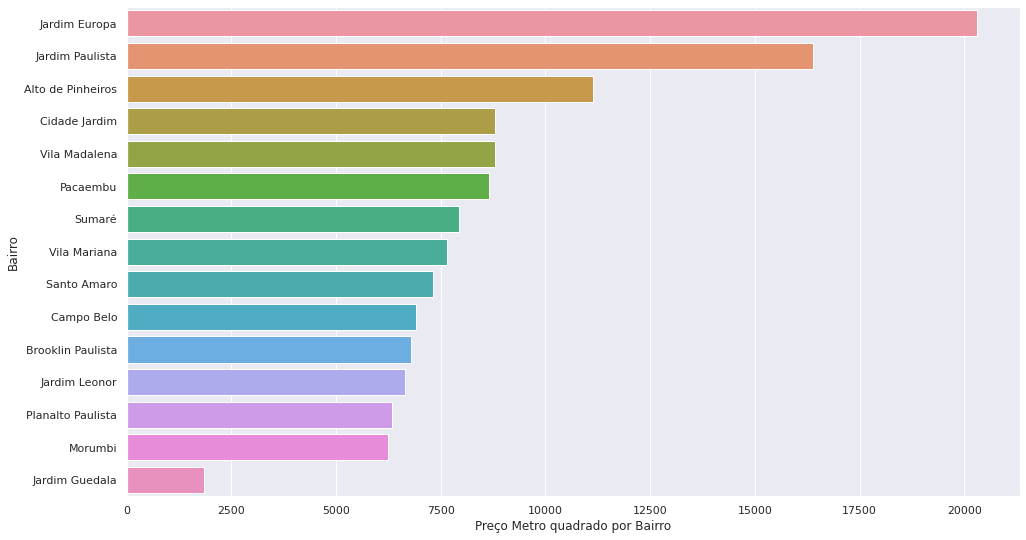

In [491]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(y="Bairro", x="Valor/m2_bairro", data=dados_bairro.query(
    "Bairro in @top_bairros").sort_values(by="Valor/m2_bairro", ascending=False))
ax.set_xlabel("Preço Metro quadrado por Bairro")

### Conclusões

O primeiro colocado é bem superior ao demais, o que indica que há alguns problemas na base. Isso é justificado porque não é esperado uma diferença tão discrepante entre os preços do primeiro para o segundo mais caro. Além disso, como não houve muitos tratamentos dos dados é de se esperar que eles ainda estejam com algumas incoerências.

Com a segunda forma de analisar o preço médio do m² por bairro, vê-se uma distribuição bem diferente da original, mesmo com alguns bairros tendo custo muito alto, não há uma discrepância grande. Isso pode indicar que a segunda forma está mais próxima da realidade, mas ainda é preciso tratar alguns dados estranho, que estão muito destoantes dos demais.

## Buscando *outliers* e analisando melhor alguns dados

Como já dito anteriormente, entender a base de dados e o problema é crucial. Um dos passos desse entendimento é remover valores muito distoante dos demais, os *outliers*. Uma excelênte forma de visualizar eles é por meio do gráfico de caixas, o qual nos motra a distribuição dos valores em 25%, 50% e 75%, partindo disso também é possível estimar valores muito discrepantes, os quais são identificados com pontos.

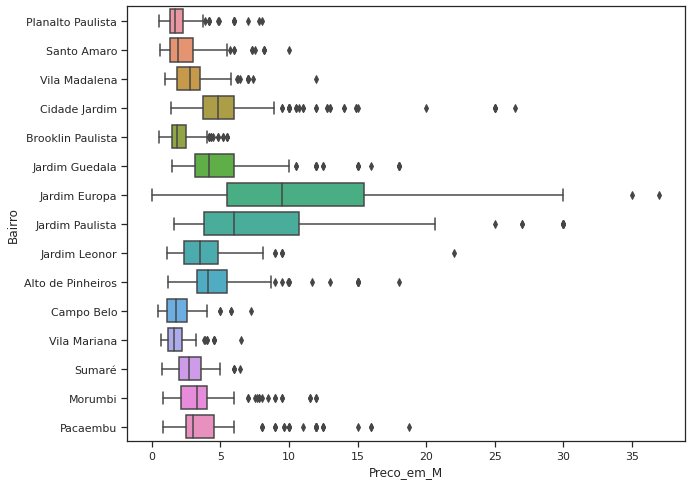

In [492]:
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y="Bairro", x="Preco_em_M", data=dados_vendas.query(
    "Bairro in @top_bairros and Preco_em_M < 60"))
plt.show()

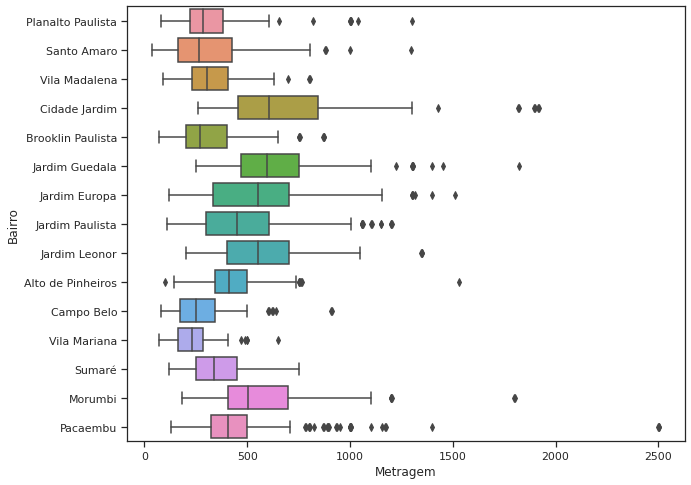

In [493]:
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y="Bairro", x="Metragem", data=dados_vendas.query(
    "Bairro in @top_bairros and Metragem < 30000"))
plt.show()

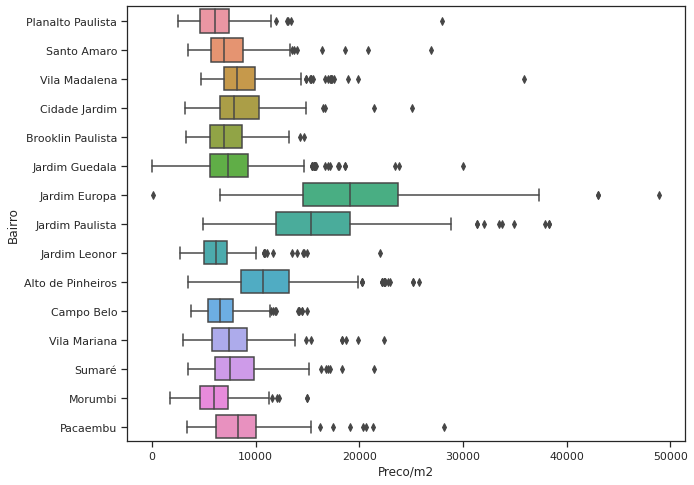

In [494]:
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y="Bairro", x="Preco/m2", data=dados_vendas.query("Bairro in @top_bairros"))
plt.show()

### Conclusões

Em todos os gŕaficos gerados há muitos valores distoantes, principalmente que são maiores que os demais. Com isso, pode-se traçar alguns filtros para remover esses dados da base, assim temos informações mais limpas e tentamos transformar em algo mais próximo da realidade.

## Adicionando mais dados ao projeto

Como visto quanto mais dados se têm melhor fica o seu entendimento do problema. Assim, é importante buscar dados públicos para confirmar as suas teses, verificar mais tendências ou trazer novos pontos de vista para a questão

In [501]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"

dados_ibge = pd.read_csv(ibge_url, sep=";", encoding='utf_8', decimal=',')

# removendo colunas com um único valor
dados_ibge.drop(columns=["Cod_setor", "Cod_Grandes Regi�es",  "Nome_Grande_Regiao",
                "Cod_UF", "Cod_meso", "Nome_da_meso", "Cod_micro", "Nome_da_micro",
                "Cod_RM", "Nome_da_RM", "Cod_municipio", "Cod_distrito", "Nome_da_UF ",
                "Cod_subdistrito", "Nome_do_subdistrito", "Cod_bairro","Nome_do_bairro",
                "Situacao_setor", "Tipo_setor", "Unnamed: 33", "Nome_do_municipio"],
                inplace=True, axis=1)

# removendo colunas de variâncai, é simples obter esses dados caso seja necessário
dados_ibge.drop(columns=["V004", "V006", "V008", "V010", "V012"], inplace=True, axis=1)

dados_ibge.replace('�','A', regex=True, inplace=True)

In [502]:
# consertando o nome dos bairros
nomes_bairros = {"AGUA RASA": "ÁGUA RASA", "BELAM": "BELÉM", "BRAS": "BRÁS",
                 "BRASILANDIA": "BRASILÂNDIA", "BUTANTA": "BUTANTÃ",
                 "CAPAO REDONDO": "CAPÃO REDONDO", "CARRAO": "CARRÃO",
                 "CONSOLAAAO": "CONSOLAÇÃO", "FREGUESIA DO A": "FREGUESIA DO Ó",
                 "GRAJAA": "GRAJAÚ", "JAAANA": "JAÇANA", "JAGUARA": "JAGUARÁ",
                 "JARAGUA": "JARAGUÁ", "JARDIM ANGELA": "JARDIM ÂNGELA",
                 "JARDIM SAO LUAS": "JARDIM SÃO LUÍS", "LIMAO": "LIMÃO",
                 "JOSA BONIFACIO": "JOSÉ BONIFÁCIO", "REPABLICA": "REPÚBLICA",
                 "SACOMA": "SACOMÃ", "SAO": "SÃO", "SANTA CECALIA": "SANTA CECÍLIA",
                 "SA": "SÉ", "SAADE": "SAÚDE", "TATUAPA": "TATUAPÉ",
                 "TREMEMBE": "TREMEMBÉ", "VILA CURUAA": "VILA CURUÇÁ",
                 "VILA JACUA": "VILA JACUÍ", "VILA SANIA": "VILA SÕNIO"}

dados_ibge.replace(nomes_bairros, regex=True, inplace=True)
dados_ibge.rename(columns={"Nome_do_distrito": "Bairro", "V001": "Domicilios",
                           "V002": "Moradores", "V003":"Moradores/Domiciolio",
                           "V005":"Rendimento_Mes/Morador",
                           "V007":"Rendimento_Mes/Responsavel",
                           "V009": "Redimento_Mes/10_anos_mais_total",
                           "V011": "Rendimento_Mes/10_anos_mais_responsavel"}, inplace=True)
dados_ibge["Bairro"] = dados_ibge["Bairro"].str.capitalize()

In [503]:
dados_ibge.sample(10)

,Bairro,Domicilios,Moradores,Moradores/Domiciolio,Rendimento_Mes/Morador,Rendimento_Mes/Responsavel,Redimento_Mes/10_anos_mais_total,Rendimento_Mes/10_anos_mais_responsavel
16739,Vila leopoldina,297.00,765.00,2.58,6133.23,6174.81,3664.00,4903.80
6148,Iguatemi,289.00,1114.00,3.85,799.79,979.41,442.20,845.17
11421,Perdizes,237.00,654.00,2.76,3819.54,4373.10,2368.13,3409.44
15716,Tucuruvi,153.00,459.00,3.00,2488.31,2719.36,1619.19,2203.16
2049,Campo grande,42.00,154.00,3.67,240.95,674.67,292.01,651.80
17447,Vila medeiros,233.00,746.00,3.20,1205.98,1652.90,722.04,1312.98
971,Brásilandia,258.00,1005.00,3.90,659.69,756.44,439.90,740.18
1799,Campo belo,121.00,292.00,2.41,3928.74,4706.70,2657.31,3510.13
15819,Tucuruvi,186.00,549.00,2.95,2297.26,2360.72,1306.48,1859.81
1246,Brásilandia,173.00,587.00,3.39,516.71,921.55,473.82,898.62


In [504]:
dados_vendas.drop(columns=["Modalidade", "Moeda", "Valor", "Cidade"], inplace=True)

KeyError: ignored

In [505]:
# unindo as bases de dados
dados_ibge_vendas = dados_vendas.merge(dados_ibge, on="Bairro", how="left")

In [506]:
dados_ibge_vendas.sample(10)

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco,Preco_em_M,Preco/m2,Domicilios,Moradores,Moradores/Domiciolio,Rendimento_Mes/Morador,Rendimento_Mes/Responsavel,Redimento_Mes/10_anos_mais_total,Rendimento_Mes/10_anos_mais_responsavel
110940,NaN,Mooca,316,3,3,12,2.000.000,2.00,6329.11,194.00,464.00,2.39,1783.98,1831.17,1390.88,1660.81
90800,NaN,Mooca,225,4,2,1,645.000,0.65,2866.67,225.00,595.00,2.64,4049.69,4160.64,2509.64,3114.64
49535,Rua Bamboré,Ipiranga,128,3,1,2,850.000,0.85,6640.62,246.00,824.00,3.35,1551.94,1659.90,873.03,1317.14
41673,"Avenida Nova Cantareira, 3924",Tucuruvi,450,4,4,6,3.100.000,3.10,6888.89,252.00,750.00,2.98,2116.63,2195.02,1357.46,1789.38
113383,NaN,Ipiranga,288,2,4,10,1.220.000,1.22,4236.11,225.00,700.00,3.11,3114.76,3185.55,1819.37,2470.51
83074,Rua Emílio Pedutti,Morumbi,615,4,6,6,3.700.000,3.70,6016.26,221.00,551.00,2.49,5508.40,5635.91,3439.31,4371.70
80908,Rua Girassol,Pinheiros,180,3,3,2,3.000.000,3.00,16666.67,127.00,326.00,2.57,1681.89,3095.65,1070.84,2610.17
94447,NaN,Pinheiros,264,5,4,2,2.700.000,2.70,10227.27,201.00,455.00,2.26,5124.90,5365.13,3560.53,4323.50
107236,NaN,Pinheiros,205,2,4,2,1.995.000,2.00,9731.71,172.00,500.00,2.91,13995.69,16488.07,6433.25,9756.38
25821,NaN,Morumbi,485,4,5,3,3.200.000,3.20,6597.94,114.00,485.00,4.25,15598.25,16019.83,6037.30,8085.67
